### Assignment 4
**Topic: Data Aggregation & Visualization**

**Group members:<br>**
<b>1. Name: Chan Jun Yao<br></b>
<b>Matrics No.: A18CS0043<br><br></b>
<b>2. Name: Ng Jing Jie<br></b>
<b>Matrics No.: A18CS0172<br></b>



<b>TASK 1</b>

(a)	Load Sales Data.csv, assign it into variable named sales. Display the first 10 rows of the sales.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#To display the figures in the notebook instead of in a new window
%matplotlib inline 
#Configure the default figure size
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
sales = pd.read_csv("Sales Data.csv")
display(sales.iloc[0:10])

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


(b)	Get total profit of all months and show line plot with the following style properties:
* Line Style dotted 
* Line color should be red
* Line width should be 3
* Add a circle marker with size 8 and blue color
* Show legend at the lower right location.
* X label name = Month Number
* Y label name = Sold Unit number
* Title = Company Sales Per Month


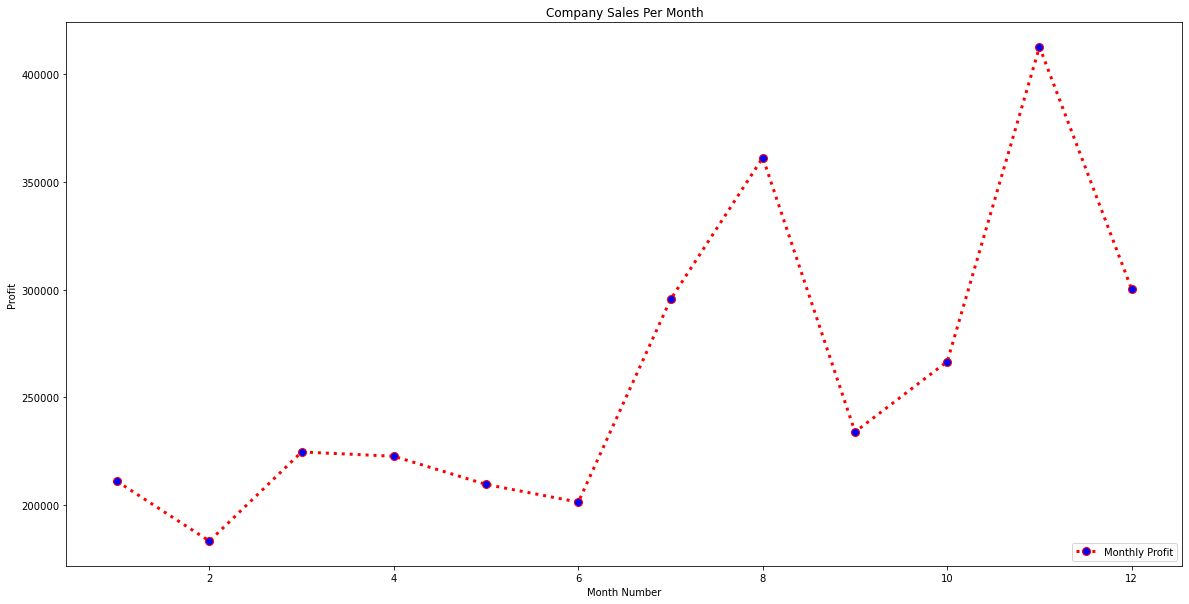

In [4]:
x = sales['month_number']
y = sales['total_profit']

plt.figure()
plt.plot(x, y, color="red", lw=3, ls=':', marker='o', markersize=8, markerfacecolor="blue")
plt.xlabel('Month Number')
plt.ylabel('Profit')
plt.title('Company Sales Per Month')
plt.legend(["Monthly Profit"], loc = 4) 
plt.show()

(c)	Read data from Sales Data.csv and show all product sales using a multiline plot, sized 1200 × 600 pixels. Differentiate all the lines by line color and marker.

In [5]:
def randomColor(count):
    result = []
    for i in range(0,count):
        r = np.random.rand()
        b = np.random.rand()
        g = np.random.rand()
        
        result.append( (r, g, b) )
    return result


def randomMarker(count):
    markerChoice = [".","o","+",",","x","D","8","s","p","*"]
    return np.random.choice(markerChoice, count, replace=False)

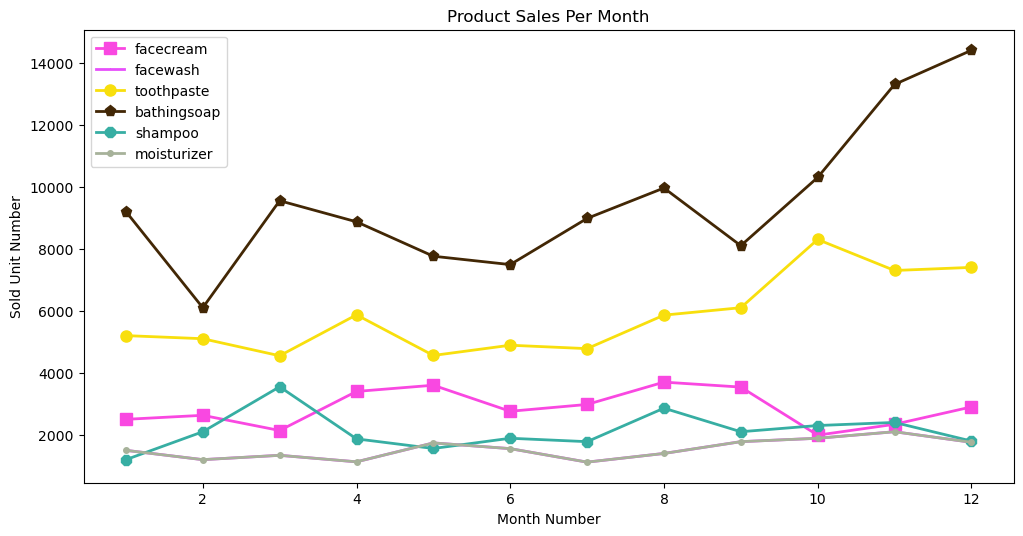

In [6]:
productDF = sales.drop(columns=['month_number','total_units','total_profit'])
x = sales['month_number']

plt.figure(figsize=(12,6), dpi=100)
plt.xlabel('Month Number')
plt.ylabel('Sold Unit Number')
plt.title('Product Sales Per Month')

colors = randomColor(len(productDF.columns))
markers = randomMarker(len(productDF.columns))

for idx,column in enumerate(productDF.columns):
    
    y = productDF[column]
    plt.plot(x, y, linewidth=2,color=colors[idx],marker=markers[idx],ms=8)

plt.legend(productDF.columns, loc = 2) 
plt.show()

(d)	The products in the sales data can be further grouped as follow:<br>
a. Category A: facecream, facewash, moisturizer<br>
b. Category B: toothpaste<br>
c. Category C: bathingsoap, shampoo

Group the data accordingly and obtain the following information, then plot into two subplots: 
1. total profit of each category for every month
2. percentage of each category for every month over the grand total profit of all categories.


In [7]:
catA = productDF[["facecream","facewash","moisturizer"]]
catB = productDF[["toothpaste"]]
catC = productDF[["bathingsoap","shampoo"]]

categoryProfit = pd.DataFrame({'Category A':catA.sum(axis=1)*10,'Category B':catB.sum(axis=1)*10,'Category C':catC.sum(axis=1)*10})
totalProfit = sales['total_profit']
categoryProfitPercentage = categoryProfit.copy()
categoryProfitPercentage['Category A'] = (categoryProfit['Category A'] / totalProfit) * 100
categoryProfitPercentage['Category B'] = (categoryProfit['Category B'] / totalProfit) * 100
categoryProfitPercentage['Category C'] = (categoryProfit['Category C'] / totalProfit) * 100

In [8]:
x = sales['month_number']

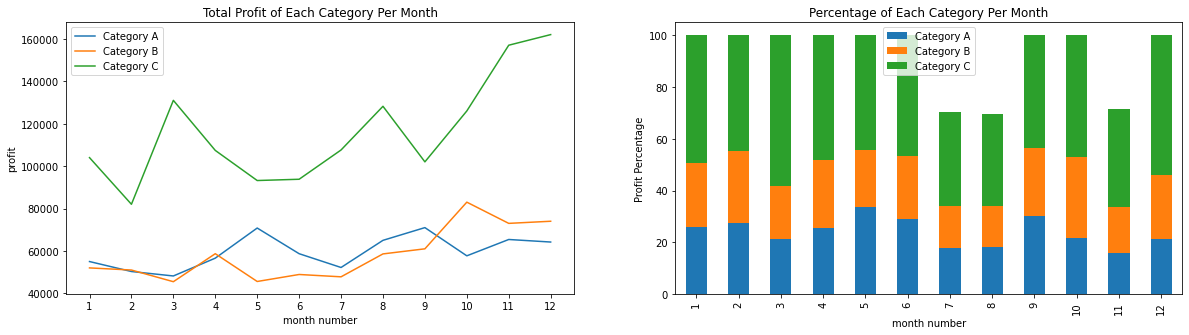

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))
      
categoryProfit.plot(kind="line",ax=axes[0])
axes[0].set_ylabel("profit")
axes[0].set_xlabel("month number")
axes[0].set_xticks(np.arange(12))
axes[0].set_xticklabels(sales['month_number'])
axes[0].set_title("Total Profit of Each Category Per Month")

categoryProfitPercentage.plot(kind="bar",stacked=True,ax=axes[1])
axes[1].set_ylabel("Profit Percentage")
axes[1].set_xlabel("month number")
axes[1].set_xticklabels(sales['month_number'])
axes[1].set_title("Percentage of Each Category Per Month")

# axes[0].set_xscale("Month Number")
# axes[0].set_yscale("Total Profit")


plt.show()

<b>TASK 2</b>

1. Read the three datasets given below and save the data into different DataFrame.<br>
a. customer.csv<br>
b. products.csv<br>
c. sales.csv


In [10]:
customer = pd.read_csv("customer.csv")
products = pd.read_csv("products.csv")
sales = pd.read_csv("sales.csv")

2. From the above datasets, produce a chart (any appropriate chart) for each below:<br>
a.	products sold by each store<br>
b. quantity sold against each product<br>
c. quantity and total sales against each product

In [11]:
# Before we continue, let's join the data into one DF

mergedDF = sales.merge(customer, left_on="c_id",right_on="c_id")
mergedDF = mergedDF.drop(columns=['product'])
mergedDF = mergedDF.merge(products, left_on="p_id",right_on="p_id")
mergedDF['sale_total'] = mergedDF['qty'] * mergedDF['price']
mergedDF = mergedDF.drop(columns=['c_id','p_id'])

mergedDF

,sale_id,qty,store,Customer,product,price,sale_total
0,1,2,ABC,Raju,Monitor,75,150
1,5,3,ABC,Raju,Monitor,75,225
2,9,2,ABC,Raju,Monitor,75,150
3,3,3,ABC,Rabi,Monitor,75,225
4,6,2,DEF,Alex,Monitor,75,150
5,2,1,DEF,Raju,CPU,55,55
6,7,3,ABC,Raju,RAM,90,270
7,4,2,DEF,Rani,RAM,90,180
8,8,2,DEF,Alex,RAM,90,180


In [12]:
storeProductSaleDF = mergedDF.groupby(["store","product"]).sum()
storeProductSaleDF = storeProductSaleDF.unstack()
storeProductSaleDF = storeProductSaleDF['qty']
storeProductSaleDF = storeProductSaleDF.fillna(0)
storeProductSaleDF

product,CPU,Monitor,RAM
store,,,
ABC,0.0,10.0,3.0
DEF,1.0,2.0,4.0


In [13]:
productQty = mergedDF.groupby(["product"]).sum()
productQty = productQty.unstack()
productQty = productQty['qty']
productQty

product
CPU         1
Monitor    12
RAM         7
dtype: int64

In [14]:
productSaleQty = mergedDF.groupby(["product"]).sum()
productSaleQty = productSaleQty[["qty","sale_total"]]
productSaleQty

,qty,sale_total
product,,
CPU,1,55
Monitor,12,900
RAM,7,630


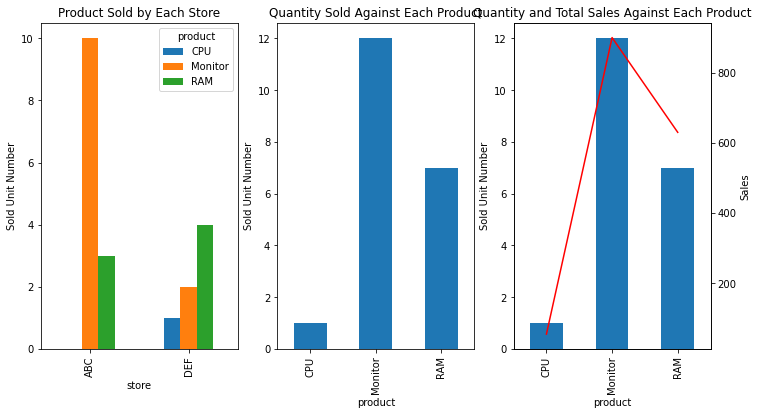

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,6))

storeProductSaleDF.plot.bar(ax=ax1)
ax1.set_ylabel("Sold Unit Number")
ax1.set_title("Product Sold by Each Store")

productQty.plot.bar(ax=ax2)
ax2.set_ylabel("Sold Unit Number")
ax2.set_title("Quantity Sold Against Each Product")

productSaleQty['qty'].plot.bar(ax=ax3)
ax3Copy = ax3.twinx()
productSaleQty['sale_total'].plot.line(ax=ax3Copy,color="red")
ax3.set_ylabel("Sold Unit Number")
ax3Copy.set_ylabel("Sales")
ax3.set_title("Quantity and Total Sales Against Each Product")

plt.show()

3.	From the above datasets, produce an output for each below:<br>
a.	quantity sold against each product against each store

In [16]:
aDF = mergedDF.groupby( ["product","store"]).sum()
aDF = aDF[['qty']]
aDF

qty
product store     
CPU     DEF      1
Monitor ABC     10
        DEF      2
RAM     ABC      3
        DEF      4

b.	quantity sold against each store with total turnover of the store

In [17]:
bDF = mergedDF.groupby(["store"]).sum()
bDF = bDF[['sale_total']]
bDF = bDF.rename(columns={'sale_total':'total turnover'})
bDF

,total turnover
store,
ABC,1020
DEF,565


c.	products which are not sold

In [18]:
soldList = list(mergedDF['product'].unique())
allProductList = list(products['product'].unique())

notSold = list(set(allProductList) - set(soldList))

print("Product Not Sold: ")
for idx,product in enumerate(notSold):
    print("{}. {}".format(idx+1,product))

Product Not Sold: 
1. Power supply
2. Motherboard
3. Hard Disk
4. Keyboard
5. Mouse


d.	customers who have not purchased any product

In [19]:
customerList = list(mergedDF['Customer'].unique())
allCustomerList = list(customer['Customer'].unique())

noBuyCustomer = list(set(allCustomerList) - set(customerList))

print("Customer did not made purchase: ")
for idx,name in enumerate(noBuyCustomer):
    print("{}. {}".format(idx+1,name))

Customer did not made purchase: 
1. Ronn
2. King
3. Tom
4. Jem
